# LBM Step 4: Collate Planes

In [9]:
%gui qt
import sys
from pathlib import Path
import os
import numpy as np
import zarr
import napari

import logging
import lbm_caiman_python as lbm

# Importing this WONT WORK withotu adding to the path
sys.path.append('../..')  # TODO: Take this out when we upload to pypi

import pandas as pd
import mesmerize_core as mc
from mesmerize_viz import *
from mesmerize_core.caiman_extensions.cnmf import cnmf_cache

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
except NameError:
    pass
try:
    import cv2
    cv2.setNumThreads(0)
except():
    pass

logging.basicConfig()

os.environ["CONDA_PREFIX_1"] = ""
if os.name == "nt":
    # disable the cache on windows, this will be automatic in a future version
    cnmf_cache.set_maxsize(0)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
chan_order = (
        np.array(
            [
                1,
                5,
                6,
                7,
                8,
                9,
                2,
                10,
                11,
                12,
                13,
                14,
                15,
                16,
                17,
                3,
                18,
                19,
                20,
                21,
                22,
                23,
                4,
                24,
                25,
                26,
                27,
                28,
            ]
        )
        - 1
)


In [11]:
parent_path = Path().home() / "caiman_data" / 'animal_01' / "session_01"

batch_path = parent_path / 'batch.pickle'
cnmf_batch_path = parent_path / 'results' / 'cnmf_batch.pickle'

# you could alos load the registration batch and
# save this patch in a new dataframe (saved to disk automatically)
cnmf_df = mc.load_batch(cnmf_batch_path)
cnmf_df=cnmf_df.caiman.reload_from_disk()
mc.set_parent_raw_data_path(str(parent_path))

# create a new batch
try:
    df = mc.load_batch(batch_path)
except (IsADirectoryError, FileNotFoundError):
    df = mc.create_batch(batch_path)

df=df.caiman.reload_from_disk()
cnmf_df

,algo,item_name,input_movie_path,params,outputs,added_time,ran_time,algo_duration,comments,uuid
0,cnmf,cnmf_1,tiff\extracted_plane_1.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': faeb27e8-40b9-4e5a-ad...,2024-10-01T16:34:44,2024-10-01T16:54:16,946.94 sec,None,faeb27e8-40b9-4e5a-ad8c-b9cc73c03635
1,cnmf,cnmf_1,tiff\extracted_plane_2.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': 89b676c7-9480-47d7-b1...,2024-10-01T16:34:44,2024-10-01T17:10:06,949.6 sec,None,89b676c7-9480-47d7-b190-e4bbc2a5decc
2,cnmf,cnmf_1,tiff\extracted_plane_3.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': f03ead24-ab13-48e7-87...,2024-10-01T16:34:44,2024-10-01T17:28:57,1131.04 sec,None,f03ead24-ab13-48e7-87c0-27d5940a7c91
3,cnmf,cnmf_1,tiff\extracted_plane_4.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': 585a0fc2-40d4-45f2-ba...,2024-10-01T16:34:44,2024-10-01T17:51:18,1340.32 sec,None,585a0fc2-40d4-45f2-badf-ba13d5cc77a6
4,cnmf,cnmf_1,tiff\extracted_plane_5.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': 544c2a52-0b90-4b74-ba...,2024-10-01T16:34:44,2024-10-01T18:08:22,1024.35 sec,None,544c2a52-0b90-4b74-baae-b2ca913c7c2a
5,cnmf,cnmf_1,tiff\extracted_plane_6.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': d6c3f33c-2b90-4c6d-a4...,2024-10-01T16:34:44,2024-10-01T18:24:00,937.73 sec,None,d6c3f33c-2b90-4c6d-a4ad-f237dae5f73b
6,cnmf,cnmf_1,tiff\extracted_plane_7.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': ca269a68-06d0-4f96-b5...,2024-10-01T16:34:44,2024-10-01T18:39:39,939.58 sec,None,ca269a68-06d0-4f96-b508-87160fdf37ab
7,cnmf,cnmf_1,tiff\extracted_plane_8.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': a9cb2077-073a-4552-96...,2024-10-01T16:34:44,2024-10-01T18:55:09,929.57 sec,None,a9cb2077-073a-4552-9669-e53ba0c96803
8,cnmf,cnmf_1,tiff\extracted_plane_9.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': c0205f69-ccb6-4304-9c...,2024-10-01T16:34:44,2024-10-01T19:10:49,940.35 sec,None,c0205f69-ccb6-4304-9cee-18af09d11663
9,cnmf,cnmf_1,tiff\extracted_plane_10.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': 1fac642d-6cef-4a68-94...,2024-10-01T16:34:44,2024-10-01T19:28:15,1045.02 sec,None,1fac642d-6cef-4a68-9415-737213b4462d


## Get outputs for each z-plane

In [12]:
results = {}
for i, row in cnmf_df.iterrows():
    if row["outputs"] is not None and row['algo']=='cnmf': # item has already been run
        results[i] = cnmf_df.iloc[i].cnmf.get_output()
results

{0: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18ed447b1f0>,
 1: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18ed447b730>,
 2: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18ed447b340>,
 3: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18ed4479e10>,
 4: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18ed447b0a0>,
 5: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18e6b3ba3e0>,
 6: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18e6b3ba980>,
 7: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18e6b3baa40>,
 8: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18e6b3b8a60>,
 9: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18e6b3b83d0>,
 10: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18e6b3baa70>,
 11: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18e6b3bb790>,
 12: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18ed447b4c0>,
 13: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18e6b3bada0>,
 14: <caiman.source_extraction.cnmf.cnmf.CNMF at 0x18e6b3b81f0>,
 15: <caiman.source_extraction.cnmf

In [13]:
e1 = results[0].estimates
e2 = results[1].estimates

In [14]:
import numpy as np
from scipy.sparse import csr_matrix, vstack
from caiman.source_extraction.cnmf import estimates
from scipy.sparse import lil_matrix
%load_ext autoreload
%autoreload 2
import lbm_caiman_python as lbm

res = lbm.collation.combine_z_planes(results)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Total number of Neurons

In [15]:
comps = {}
for i, row in cnmf_df.iterrows():
    if row["outputs"] is not None and row['algo']=='cnmf': # item has already been run
        comps[i] = cnmf_df.iloc[i].cnmf.get_good_components()
comps

{0: array([   1,    2,    4, ..., 8919, 8920, 8921]),
 1: array([   0,    1,    2, ..., 9015, 9017, 9018]),
 2: array([   0,    1,    2, ..., 8788, 8789, 8791]),
 3: array([    1,     3,     4, ..., 10061, 10063, 10065]),
 4: array([   0,    1,    4, ..., 8774, 8775, 8776]),
 5: array([   0,    1,    3, ..., 8845, 8846, 8848]),
 6: array([   0,    1,    2, ..., 8814, 8816, 8818]),
 7: array([   0,    1,    2, ..., 8846, 8847, 8848]),
 8: array([   0,    1,    3, ..., 8880, 8881, 8882]),
 9: array([   0,    2,    3, ..., 9042, 9043, 9044]),
 10: array([   3,    5,    6, ..., 9312, 9313, 9314]),
 11: array([   1,    7,    9, ..., 9460, 9461, 9462]),
 12: array([   4,    5,    9, ..., 9752, 9754, 9755]),
 13: array([   1,    3,    4, ..., 9915, 9917, 9918]),
 14: array([    0,     1,     3, ..., 10016, 10048, 10051]),
 15: array([    0,     1,     2, ..., 10127, 10128, 10129]),
 16: array([    0,     1,     2, ..., 10024, 10025, 10026]),
 17: array([   0,    1,    2, ..., 9151, 9152, 9154

In [16]:
num_components = [len(c) for c in comps.values()]
sum(num_components)

73973

In [8]:
from ipywidgets import Tab, interact_manual
@interact_manual(parent_path=str(parent_path), batch_path=str(cnmf_batch_path))
def start_widget(parent_path, batch_path):
    mc.set_parent_raw_data_path(parent_path)

    df = mc.load_batch(batch_path)

    tab = Tab()

    # mcorr_container = df.mcorr.viz()
    cnmf_container = df.cnmf.viz(start_index=1)

    tab.children = [cnmf_container.show()]
    tab.titles = ["cnmf"]
    display(tab)

interactive(children=(Text(value='C:\\Users\\RBO\\caiman_data\\animal_01\\session_01', continuous_update=False…

## Combine results of different z_planes

In [17]:
df_rows = cnmf_df.iloc[cnmf_df[cnmf_df['algo']=='cnmf'].index].copy()
df_rows

,algo,item_name,input_movie_path,params,outputs,added_time,ran_time,algo_duration,comments,uuid
0,cnmf,cnmf_1,tiff\extracted_plane_1.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': faeb27e8-40b9-4e5a-ad...,2024-10-01T16:34:44,2024-10-01T16:54:16,946.94 sec,None,faeb27e8-40b9-4e5a-ad8c-b9cc73c03635
1,cnmf,cnmf_1,tiff\extracted_plane_2.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': 89b676c7-9480-47d7-b1...,2024-10-01T16:34:44,2024-10-01T17:10:06,949.6 sec,None,89b676c7-9480-47d7-b190-e4bbc2a5decc
2,cnmf,cnmf_1,tiff\extracted_plane_3.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': f03ead24-ab13-48e7-87...,2024-10-01T16:34:44,2024-10-01T17:28:57,1131.04 sec,None,f03ead24-ab13-48e7-87c0-27d5940a7c91
3,cnmf,cnmf_1,tiff\extracted_plane_4.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': 585a0fc2-40d4-45f2-ba...,2024-10-01T16:34:44,2024-10-01T17:51:18,1340.32 sec,None,585a0fc2-40d4-45f2-badf-ba13d5cc77a6
4,cnmf,cnmf_1,tiff\extracted_plane_5.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': 544c2a52-0b90-4b74-ba...,2024-10-01T16:34:44,2024-10-01T18:08:22,1024.35 sec,None,544c2a52-0b90-4b74-baae-b2ca913c7c2a
5,cnmf,cnmf_1,tiff\extracted_plane_6.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': d6c3f33c-2b90-4c6d-a4...,2024-10-01T16:34:44,2024-10-01T18:24:00,937.73 sec,None,d6c3f33c-2b90-4c6d-a4ad-f237dae5f73b
6,cnmf,cnmf_1,tiff\extracted_plane_7.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': ca269a68-06d0-4f96-b5...,2024-10-01T16:34:44,2024-10-01T18:39:39,939.58 sec,None,ca269a68-06d0-4f96-b508-87160fdf37ab
7,cnmf,cnmf_1,tiff\extracted_plane_8.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': a9cb2077-073a-4552-96...,2024-10-01T16:34:44,2024-10-01T18:55:09,929.57 sec,None,a9cb2077-073a-4552-9669-e53ba0c96803
8,cnmf,cnmf_1,tiff\extracted_plane_9.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': c0205f69-ccb6-4304-9c...,2024-10-01T16:34:44,2024-10-01T19:10:49,940.35 sec,None,c0205f69-ccb6-4304-9cee-18af09d11663
9,cnmf,cnmf_1,tiff\extracted_plane_10.tif,"{'main': {'fr': 9.62, 'dxy': (1.0, 1.0), 'deca...",{'mean-projection-path': 1fac642d-6cef-4a68-94...,2024-10-01T16:34:44,2024-10-01T19:28:15,1045.02 sec,None,1fac642d-6cef-4a68-9415-737213b4462d


In [18]:
import dask.array as da
projs = da.stack([da.from_array(row.caiman.get_projection('mean')) for i, row in df_rows.iterrows() if row["outputs"] is not None and row['algo']=='cnmf'])
projs.shape

(28, 583, 536)

In [19]:
# sort first index according to chan_order
projs = projs[chan_order]

In [61]:
import fastplotlib as fpl

widget = fpl.ImageWidget(projs)
widget.show()

ValueError: dask.array.histogram requires either specifying bins as an iterable or specifying both a range and the number of bins

In [ ]:
widget.close()

In [27]:
import napari
napari.view_image(projs, name = 'z-stack')

Viewer(camera=Camera(center=(0.0, 291.0, 267.5), zoom=1.0244402985074625, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(13.0, 1.0, 0.0), scaled=True, style=<CursorStyle.STANDARD: 'standard'>, size=1.0), dims=Dims(ndim=3, ndisplay=2, order=(0, 1, 2), axis_labels=('0', '1', '2'), rollable=(True, True, True), range=(RangeTuple(start=0.0, stop=27.0, step=1.0), RangeTuple(start=0.0, stop=582.0, step=1.0), RangeTuple(start=0.0, stop=535.0, step=1.0)), margin_left=(0.0, 0.0, 0.0), margin_right=(0.0, 0.0, 0.0), point=(13.0, 291.0, 267.0), last_used=0), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'z-stack' at 0x196004b0910>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x00000195FCF

## z-stack alignment

## 1. Align each plane to the reference plane

In [20]:
reference_image = projs.mean(axis=0).compute()

## 2. Align each plane to the reference plane

In [38]:
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift
import dask
from dask import delayed
import napari

def compute_shift_and_align(image, template):
    shift_estimate, error, diffphase = phase_cross_correlation(template, image)
    print(f"Shift estimate: {shift_estimate}")
    return shift(image, shift=(-shift_estimate[0], -shift_estimate[1]), mode='constant', cval=0)

compute_shift_and_align_delayed = delayed(compute_shift_and_align)

aligned_images = [
    compute_shift_and_align_delayed(projs[i].compute(), reference_image)
    for i in range(projs.shape[0])
]

aligned_images = dask.compute(*aligned_images)
aligned_stack = np.stack(aligned_images, axis=0)
aligned_stack = da.from_array(aligned_stack)

In [39]:
def compute_shift_and_align_pair(image1, image2):
    shift_estimate, error, diffphase = phase_cross_correlation(image1, image2)
    print(f"Shift estimate between planes: {shift_estimate}")
    # Align image2 to image1
    aligned_image = shift(image2, shift=(-shift_estimate[0], -shift_estimate[1]), mode='constant', cval=0)
    return aligned_image, shift_estimate

aligned_images = []
shift_estimates = []

# Use the first image as the starting point
aligned_images.append(projs[0].compute())

for i in range(1, projs.shape[0]):
    image1 = aligned_images[-1]
    image2 = projs[i].compute()
    aligned_image, shift_estimate = compute_shift_and_align_pair(image1, image2)
    aligned_images.append(aligned_image)
    shift_estimates.append(shift_estimate)

aligned_stack = np.stack(aligned_images, axis=0)

Shift estimate between planes: [ 0. 18.]
Shift estimate between planes: [0. 0.]
Shift estimate between planes: [ 0. 16.]
Shift estimate between planes: [ 0. -1.]
Shift estimate between planes: [ 0. 16.]
Shift estimate between planes: [0. 9.]
Shift estimate between planes: [  0. -22.]
Shift estimate between planes: [ 0. 48.]
Shift estimate between planes: [  0. -36.]
Shift estimate between planes: [ 0. 48.]
Shift estimate between planes: [  0. -36.]
Shift estimate between planes: [ 0. 48.]
Shift estimate between planes: [  0. -36.]
Shift estimate between planes: [ 0. 48.]
Shift estimate between planes: [   5. -266.]
Shift estimate between planes: [  -5. -250.]
Shift estimate between planes: [  5. 250.]
Shift estimate between planes: [  -5. -234.]
Shift estimate between planes: [  5. 249.]
Shift estimate between planes: [230. -35.]
Shift estimate between planes: [-230.   48.]
Shift estimate between planes: [230. -35.]
Shift estimate between planes: [-230.   48.]
Shift estimate between pl

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


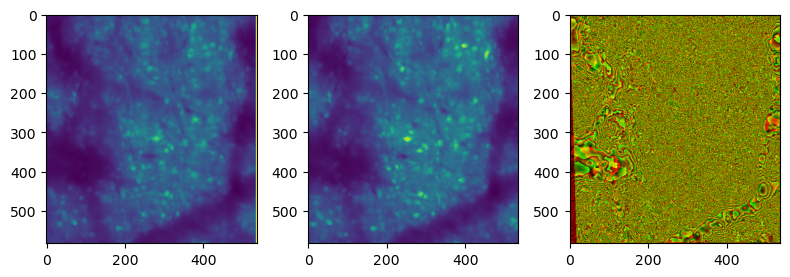

In [28]:
def visualize_transform(image_1, image_2):
    from dipy.align.transforms import AffineTransform2D
    from dipy.align.imaffine import AffineRegistration
    import matplotlib.pyplot as plt
    
    affreg = AffineRegistration()
    transform = AffineTransform2D()
    affine = affreg.optimize(image_1, image_2, transform, params0=None)
    
    image_2_xform = affine.transform(image_2)

    fig, axes = plt.subplots(1, 3, figsize=(8, 4))
    ax = axes.ravel()

    ax[0].imshow(image_1)
    ax[1].imshow(image_2)

    stereo = np.zeros((image_1.shape[0], image_1.shape[1], 3), dtype=np.uint8)
    stereo[..., 0] = image_1
    stereo[..., 1] = image_2_xform
    ax[2].imshow(stereo)
    fig.tight_layout()
    return image_2_xform

tranformed = visualize_transform(projs[0].compute(), projs[1].compute())
data = np.stack([projs[0].compute(), tranformed], axis=0)
viewer = napari.view_image(data, name='Aligned Z-Planes')

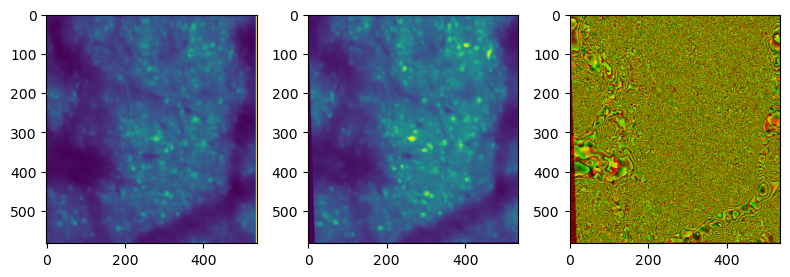

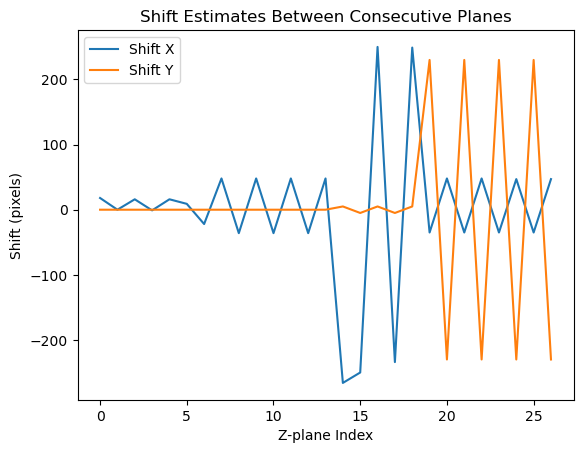

In [40]:

shift_estimates = np.array(shift_estimates)
plt.figure()
plt.plot(shift_estimates[:, 1], label='Shift X')
plt.plot(shift_estimates[:, 0], label='Shift Y')
plt.legend()
plt.title('Shift Estimates Between Consecutive Planes')
plt.xlabel('Z-plane Index')
plt.ylabel('Shift (pixels)')
plt.show()

In [41]:
viewer = napari.view_image(projs, name = 'z-stack')
viewer.add_image(aligned_stack, name = 'aligned z-stack')


<Image layer 'aligned z-stack' at 0x196bec56d10>

In [47]:
import numpy as np
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift
import napari
import matplotlib.pyplot as plt

def compute_horizontal_shift_and_align_pair(image1, image2):
    """
    Compute the horizontal shift between two images and align image2 to image1.
    
    Parameters:
        image1 (ndarray): The reference image (previous z-plane).
        image2 (ndarray): The image to align (current z-plane).
        
    Returns:
        aligned_image (ndarray): The aligned image.
        x_shift (float): The estimated horizontal shift.
    """
    # Compute the shift using phase cross-correlation
    shift_estimate, error, diffphase = phase_cross_correlation(image1, image2)

    # Only take the shift along x-axis (horizontal shift)
    x_shift = shift_estimate[1]
    print(f"Horizontal shift estimate between planes: {x_shift:.2f} pixels")

    aligned_image = shift(image2, shift=(0, -x_shift), mode='constant', cval=0)
    return aligned_image, x_shift

# Compute the first image and add it to the aligned_images list
first_image = projs[0].compute()
second_image = projs[1].compute()

# Align the second image to the first image using only horizontal shifts
aligned_image, x_shift = compute_horizontal_shift_and_align_pair(first_image, second_image)

data = np.stack([first_image, aligned_image], axis=0)
viewer = napari.view_image(data, name='Aligned Z-Planes')

Horizontal shift estimate between planes: 18.00 pixels


In [ ]:

# Initialize lists to store aligned images and shift estimates

# Iterate through each pair of z-planes
for i in range(1, projs.shape[0]):
    # Get the previous aligned image
    image1 = aligned_images[-1]

    # Compute the current image
    image2 = projs[i].compute()

    # Align image2 to image1 using only horizontal shifts
    aligned_image, x_shift = compute_horizontal_shift_and_align_pair(image1, image2)

    # Append the aligned image and shift estimate to the lists
    aligned_images.append(aligned_image)
    shift_estimates.append(x_shift)

# Stack the aligned images into a 3D array
aligned_stack = np.stack(aligned_images, axis=0)

# Visualize the horizontal shift estimates
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(shift_estimates) + 1), shift_estimates, marker='o')
plt.title('Horizontal Shift Estimates Between Consecutive Z-Planes')
plt.xlabel('Z-plane Index')
plt.ylabel('Horizontal Shift (pixels)')
plt.grid(True)
plt.show()

# Visualize the original and aligned stacks using napari
viewer = napari.view_image(projs.compute(), name='Original Z-Stack')
viewer.add_image(aligned_stack, name='Aligned Z-Stack')
